In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import utils.data as data

In [3]:
dataset = data.Marconi100Dataset(data.get_dataset_paths())

100%|██████████| 249/249 [00:32<00:00,  7.71it/s]


In [81]:
sequences = []
for i in data.tqdm(range(len(dataset))):
    df, labels = dataset[i]

    count = 0
    counting = False
    for l in data.tqdm(labels, leave=False):
        if l == 0:
            if counting:
                sequences.append(count)
                counting = False
        else:
            counting = True
            count += 1      

100%|██████████| 249/249 [02:16<00:00,  1.82it/s]


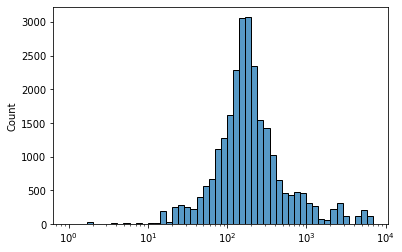

In [90]:
import seaborn as sns

sns.histplot(sequences, bins=50, log_scale=(True, False));

In [100]:
from collections import Counter

counter = Counter(sequences)

3

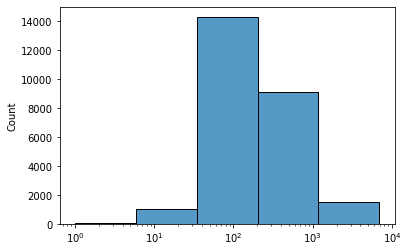

In [101]:
sns.histplot(sequences, bins=5, log_scale=(True, False));

In [103]:
import numpy as np

print(np.mean(sequences))
print(np.std(sequences))

390.948304336137
811.2291949345761


In [104]:
log_seq = list(map(np.log10, sequences))

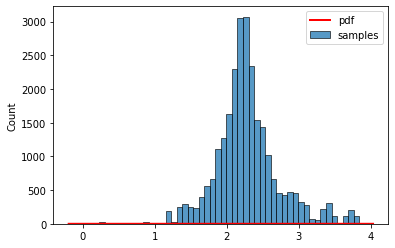

In [114]:
import matplotlib.pyplot as plt
import scipy.stats as stats

ax = sns.histplot(log_seq, bins=50, label="samples")

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
mu = np.mean(log_seq)
std = np.std(log_seq)
x_pdf = np.linspace(x0, x1, 1000)
y_pdf = stats.norm.pdf(x_pdf, mu, std)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
ax.legend()